In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

df = pd.read_csv("../datascripts/advanced_features/football_ml_data_all_years.csv")

In [2]:
df.columns

Index(['fixture_id', 'date', 'home_team_id', 'home_team_name', 'away_team_id',
       'away_team_name', 'round', 'home_wins_last_n', 'home_draws_last_n',
       'home_losses_last_n', 'home_goals_scored_last_n',
       'home_goals_conceded_last_n', 'home_points_last_n', 'away_wins_last_n',
       'away_draws_last_n', 'away_losses_last_n', 'away_goals_scored_last_n',
       'away_goals_conceded_last_n', 'away_points_last_n', 'home_avg_rating',
       'home_team_goals_scored', 'home_team_assists', 'home_team_shots',
       'home_team_shots_on', 'home_team_passes', 'home_team_key_passes',
       'home_avg_pass_accuracy', 'home_team_tackles', 'home_team_fouls',
       'home_team_yellows', 'home_team_reds', 'away_avg_rating',
       'away_team_goals_scored', 'away_team_assists', 'away_team_shots',
       'away_team_shots_on', 'away_team_passes', 'away_team_key_passes',
       'away_avg_pass_accuracy', 'away_team_tackles', 'away_team_fouls',
       'away_team_yellows', 'away_team_reds', 'h2h_

In [3]:
target_variables = [
    'fixture_id', 
    'home_team_id',
    'away_team_id',
    # 'match_result',
    'home_win',
    'draw',
    'away_win',
    'total_goals',
    'goal_difference'
]

df = df.drop(columns=target_variables)

In [4]:
def basic_dataset_info(df):
    print(f"\n📊 Shape: {df.shape}")
    print(f"   - No matches: {df.shape[0]:,}")
    print(f"   - No features: {df.shape[0]:,}")
    
    print(f"\n💾 storage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n📋 head:")
    display(df.head())
    
    print("\n📋 tail:")
    display(df.tail())
    
    print("\n🔍 data info:")
    print(df.dtypes.value_counts())
    
    return df.info()

basic_dataset_info(df)


📊 Shape: (1960, 52)
   - No matches: 1,960
   - No features: 1,960

💾 storage: 1.26 MB

📋 head:


,date,home_team_name,away_team_name,round,home_wins_last_n,home_draws_last_n,home_losses_last_n,home_goals_scored_last_n,home_goals_conceded_last_n,home_points_last_n,away_wins_last_n,away_draws_last_n,away_losses_last_n,away_goals_scored_last_n,away_goals_conceded_last_n,away_points_last_n,home_avg_rating,home_team_goals_scored,home_team_assists,home_team_shots,home_team_shots_on,home_team_passes,home_team_key_passes,home_avg_pass_accuracy,home_team_tackles,home_team_fouls,home_team_yellows,home_team_reds,away_avg_rating,away_team_goals_scored,away_team_assists,away_team_shots,away_team_shots_on,away_team_passes,away_team_key_passes,away_avg_pass_accuracy,away_team_tackles,away_team_fouls,away_team_yellows,away_team_reds,h2h_home_wins,h2h_draws,h2h_away_wins,h2h_avg_goals,home_goals_scored_ema,home_goals_conceded_ema,home_points_ema,away_goals_scored_ema,away_goals_conceded_ema,away_points_ema,match_result,season
0,2020-09-12 11:30:00+00:00,Fulham,Arsenal,Regular Season - 1,0,0,0,0,0,0,0,0,0,0,0,0,6.528571,0,0,4,2,523.0,3.0,32.928571,11.0,12,2,0,6.771429,3,2,10,6,626.0,8.0,40.142857,12.0,12,2,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,2020
1,2020-09-12 14:00:00+00:00,Crystal Palace,Southampton,Regular Season - 1,0,0,0,0,0,0,0,0,0,0,0,0,6.961538,1,1,5,3,236.0,5.0,9.307692,15.0,14,2,0,6.764286,0,0,8,5,580.0,6.0,32.714286,28.0,11,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020
2,2020-09-12 16:30:00+00:00,Liverpool,Leeds,Regular Season - 1,0,0,0,0,0,0,0,0,0,0,0,0,6.235714,4,1,9,6,432.0,14.0,23.428571,13.0,9,1,0,6.700000,3,2,4,3,459.0,3.0,24.785714,34.0,6,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020
3,2020-09-12 19:00:00+00:00,West Ham,Newcastle,Regular Season - 1,0,0,0,0,0,0,0,0,0,0,0,0,6.221429,0,0,8,3,474.0,11.0,28.071429,14.0,13,2,0,7.264286,2,2,9,2,342.0,13.0,19.000000,13.0,7,2,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,2020
4,2020-09-13 13:00:00+00:00,West Brom,Leicester,Regular Season - 1,0,0,0,0,0,0,0,0,0,0,0,0,6.292857,0,0,4,1,336.0,4.0,18.214286,7.0,12,1,0,7.330769,3,1,10,7,604.0,6.0,39.307692,17.0,9,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,2020



📋 tail:


,date,home_team_name,away_team_name,round,home_wins_last_n,home_draws_last_n,home_losses_last_n,home_goals_scored_last_n,home_goals_conceded_last_n,home_points_last_n,away_wins_last_n,away_draws_last_n,away_losses_last_n,away_goals_scored_last_n,away_goals_conceded_last_n,away_points_last_n,home_avg_rating,home_team_goals_scored,home_team_assists,home_team_shots,home_team_shots_on,home_team_passes,home_team_key_passes,home_avg_pass_accuracy,home_team_tackles,home_team_fouls,home_team_yellows,home_team_reds,away_avg_rating,away_team_goals_scored,away_team_assists,away_team_shots,away_team_shots_on,away_team_passes,away_team_key_passes,away_avg_pass_accuracy,away_team_tackles,away_team_fouls,away_team_yellows,away_team_reds,h2h_home_wins,h2h_draws,h2h_away_wins,h2h_avg_goals,home_goals_scored_ema,home_goals_conceded_ema,home_points_ema,away_goals_scored_ema,away_goals_conceded_ema,away_points_ema,match_result,season
1955,2025-09-27 16:30:00+00:00,Nottingham Forest,Sunderland,Regular Season - 6,1,2,2,5,9,5,2,2,1,6,4,8,6.406250,0,0,16,6,567.0,16.0,31.875000,16.0,11,4,0,7.05000,1,1,8,3,306.0,5.0,15.375000,10.0,6,2,0,0,0,0,0.0,1.625777,1.540947,1.625777,1.769620,0.502698,2.040093,-1,2025
1956,2025-09-27 19:00:00+00:00,Tottenham,Wolves,Regular Season - 6,3,1,1,10,3,10,0,0,5,3,12,0,6.825000,1,1,8,3,398.0,7.0,20.312500,17.0,9,3,0,6.37500,1,0,8,3,394.0,5.0,20.062500,31.0,11,2,0,0,0,0,0.0,2.353459,0.485349,2.271225,0.425244,2.951438,0.000000,0,2025
1957,2025-09-28 13:00:00+00:00,Aston Villa,Fulham,Regular Season - 6,0,3,2,1,5,3,2,2,1,6,5,8,6.937500,3,3,7,4,403.0,6.0,21.250000,10.0,10,1,0,6.55625,1,1,8,4,414.0,7.0,22.312500,16.0,13,4,0,0,0,0,0.0,0.181818,0.646541,0.778704,1.241923,0.972953,1.539444,1,2025
1958,2025-09-28 15:30:00+00:00,Newcastle,Arsenal,Regular Season - 6,1,3,1,3,3,6,3,1,1,10,2,10,6.331250,1,1,4,3,279.0,8.0,12.125000,12.0,8,2,0,6.89375,2,2,14,7,495.0,15.0,25.312500,13.0,9,1,0,0,0,0,0.0,0.347927,0.298750,1.197937,1.574141,0.303531,2.271225,-1,2025
1959,2025-09-29 19:00:00+00:00,Everton,West Ham,Regular Season - 6,2,1,2,6,5,7,1,0,4,5,13,3,6.930769,1,1,9,6,447.0,9.0,29.230769,11.0,7,3,0,5.82000,1,0,8,3,416.0,10.0,22.133333,16.0,16,4,0,0,0,0,0.0,0.746124,1.055187,0.812649,0.646541,2.652210,0.365139,0,2025



🔍 data info:
int64      31
float64    17
object      4
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        1960 non-null   object 
 1   home_team_name              1960 non-null   object 
 2   away_team_name              1960 non-null   object 
 3   round                       1960 non-null   object 
 4   home_wins_last_n            1960 non-null   int64  
 5   home_draws_last_n           1960 non-null   int64  
 6   home_losses_last_n          1960 non-null   int64  
 7   home_goals_scored_last_n    1960 non-null   int64  
 8   home_goals_conceded_last_n  1960 non-null   int64  
 9   home_points_last_n          1960 non-null   int64  
 10  away_wins_last_n            1960 non-null   int64  
 11  away_draws_last_n           1960 non-null   int64  
 12  away_los

In [5]:
def identify_variable_types(df):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    
    binary_features = [col for col in numeric_features 
                       if df[col].nunique() == 2 and set(df[col].unique()).issubset({0, 1})]
    
    low_cardinality = [col for col in numeric_features 
                       if df[col].nunique() < 10 and col not in binary_features]
    
    print(f"\n🔢 Numeric features ({len(numeric_features)}):")
    print(numeric_features)
    
    print(f"\n📝 Categorical features ({len(categorical_features)}):")
    print(categorical_features)
    
    print(f"\n✅ Binary features ({len(binary_features)}):")
    print(binary_features)
    
    print(f"\n🔤 Low cardinality features ({len(low_cardinality)}):")
    for col in low_cardinality:
        print(f"   - {col}: {df[col].nunique()} unique values")
    
    return {
        'numeric': numeric_features,
        'categorical': categorical_features,
        'binary': binary_features,
        'low_cardinality': low_cardinality
    }

feature_types = identify_variable_types(df)


🔢 Numeric features (48):
['home_wins_last_n', 'home_draws_last_n', 'home_losses_last_n', 'home_goals_scored_last_n', 'home_goals_conceded_last_n', 'home_points_last_n', 'away_wins_last_n', 'away_draws_last_n', 'away_losses_last_n', 'away_goals_scored_last_n', 'away_goals_conceded_last_n', 'away_points_last_n', 'home_avg_rating', 'home_team_goals_scored', 'home_team_assists', 'home_team_shots', 'home_team_shots_on', 'home_team_passes', 'home_team_key_passes', 'home_avg_pass_accuracy', 'home_team_tackles', 'home_team_fouls', 'home_team_yellows', 'home_team_reds', 'away_avg_rating', 'away_team_goals_scored', 'away_team_assists', 'away_team_shots', 'away_team_shots_on', 'away_team_passes', 'away_team_key_passes', 'away_avg_pass_accuracy', 'away_team_tackles', 'away_team_fouls', 'away_team_yellows', 'away_team_reds', 'h2h_home_wins', 'h2h_draws', 'h2h_away_wins', 'h2h_avg_goals', 'home_goals_scored_ema', 'home_goals_conceded_ema', 'home_points_ema', 'away_goals_scored_ema', 'away_goals_con


✅ No missing data in df

🔍 Pattern of missing data (corr matrix):


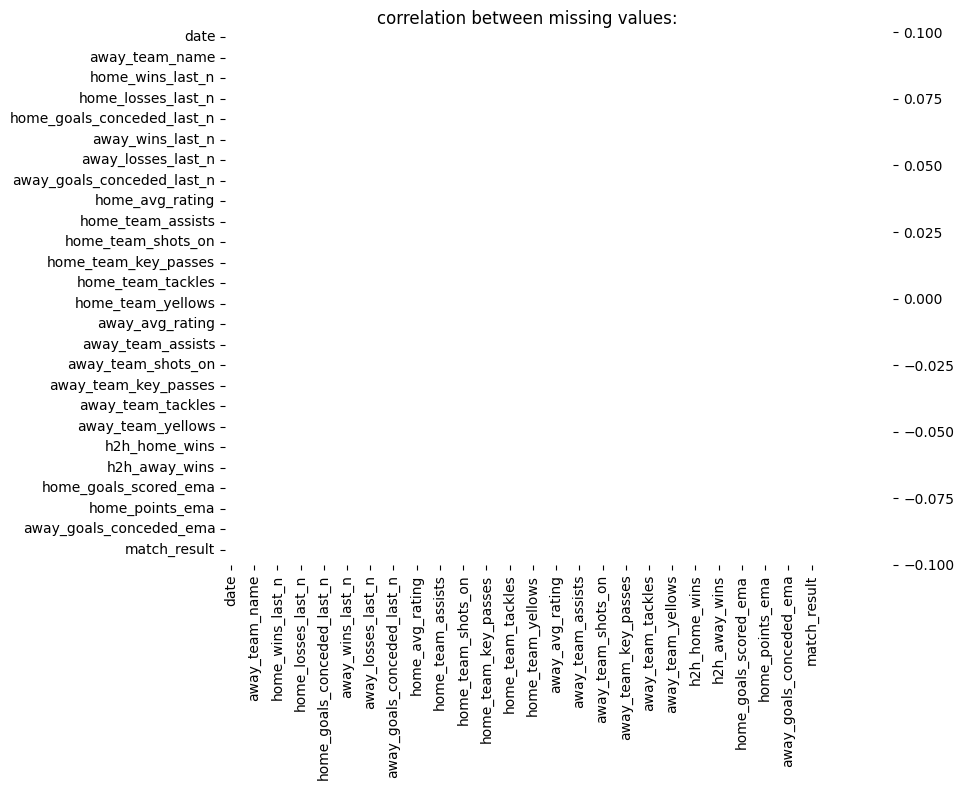

In [6]:
def analyze_missing_data(df):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'column': missing.index,
        'missing': missing.values,
        'percent': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['missing'] > 0].sort_values('missing', ascending=False)
    
    if len(missing_df) == 0:
        print("\n✅ No missing data in df")
    else:
        print(f"\n⚠️  Found {len(missing_df)} columns with missing data:")
        print(missing_df.to_string(index=False))
        
        plt.figure(figsize=(12, 6))
        plt.barh(missing_df['column'], missing_df['percent'])
        plt.xlabel('Percent of missing data')
        plt.title('Missing data in individual columns:')
        plt.tight_layout()
        plt.show()
    
    print("\n🔍 Pattern of missing data (corr matrix):")
    missing_corr = df.isnull().corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(missing_corr, cmap='coolwarm', center=0, annot=False)
    plt.title('correlation between missing values:')
    plt.tight_layout()
    plt.show()
    
    return missing_df

missing_analysis = analyze_missing_data(df)


📊 Descriptive statistics:


,home_goals_scored_last_n,home_goals_conceded_last_n,home_points_last_n,away_goals_scored_last_n,away_goals_conceded_last_n,away_points_last_n,home_avg_rating,home_team_goals_scored,home_team_assists,home_team_shots,home_team_shots_on,home_team_passes,home_team_key_passes,home_avg_pass_accuracy,home_team_tackles,home_team_fouls,home_team_yellows,away_avg_rating,away_team_goals_scored,away_team_assists,away_team_shots,away_team_shots_on,away_team_passes,away_team_key_passes,away_avg_pass_accuracy,away_team_tackles,away_team_fouls,away_team_yellows,h2h_avg_goals,home_goals_scored_ema,home_goals_conceded_ema,home_points_ema,away_goals_scored_ema,away_goals_conceded_ema,away_points_ema
count,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000,1960.000
mean,6.519,6.610,6.209,6.626,6.518,6.368,6.784,1.497,1.058,9.993,4.864,466.632,10.485,26.625,16.656,10.683,1.761,6.735,1.304,0.943,8.436,4.140,449.338,8.834,25.360,16.985,10.893,1.981,1.400,1.386,1.403,1.332,1.402,1.384,1.361
std,3.702,3.533,3.705,3.728,3.536,3.723,0.325,1.303,1.088,4.180,2.616,135.093,4.763,9.833,5.299,3.466,1.328,0.330,1.222,1.046,3.841,2.389,130.006,4.315,9.519,5.351,3.575,1.397,1.878,0.694,0.668,0.729,0.704,0.656,0.732
min,0.000,0.000,0.000,0.000,0.000,0.000,5.262,0.000,0.000,0.000,0.000,161.000,0.000,5.333,4.000,1.000,0.000,5.375,0.000,0.000,0.000,0.000,148.000,0.000,4.875,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.000,4.000,4.000,4.000,4.000,3.000,6.586,1.000,0.000,7.000,3.000,365.000,7.000,19.467,13.000,8.000,1.000,6.550,0.000,0.000,6.000,2.000,352.000,6.000,18.429,13.000,8.000,1.000,0.000,0.915,1.000,0.812,0.959,0.993,0.843
50%,6.000,6.000,6.000,6.000,6.000,6.000,6.812,1.000,1.000,10.000,5.000,455.500,10.000,25.433,16.000,11.000,2.000,6.750,1.000,1.000,8.000,4.000,439.000,8.000,24.071,17.000,11.000,2.000,0.000,1.337,1.379,1.324,1.364,1.358,1.351
75%,9.000,9.000,9.000,9.000,9.000,9.000,7.006,2.000,2.000,13.000,6.000,558.250,13.000,32.869,20.000,13.000,3.000,6.956,2.000,1.000,11.000,5.000,534.000,11.000,31.194,20.000,13.000,3.000,3.000,1.807,1.790,1.813,1.804,1.754,1.854
max,24.000,20.000,15.000,23.000,20.000,15.000,7.808,8.000,6.000,27.000,16.000,1000.000,30.000,67.429,39.000,23.000,7.000,7.700,8.000,7.000,22.000,15.000,925.000,33.000,72.583,46.000,25.000,8.000,9.000,4.091,5.000,3.000,5.000,4.455,3.000



📈 Skewness i Kurtosis:
                            Skewness  Kurtosis
away_team_assists           1.242645  1.764928
h2h_avg_goals               1.231517  0.778474
home_team_assists           1.107942  1.262164
away_team_goals_scored      1.045918  1.245524
home_team_goals_scored      0.986733  1.197501
away_team_shots_on          0.836799  1.116329
away_avg_pass_accuracy      0.753785  0.723389
away_team_key_passes        0.748449  0.809739
home_team_shots_on          0.699394  0.697047
home_team_key_passes        0.682646  0.636723
home_team_yellows           0.669950  0.204678
away_team_shots             0.618173  0.397550
home_avg_pass_accuracy      0.612763  0.362565
away_team_yellows           0.586250  0.188286
home_goals_scored_last_n    0.546345  0.406765
away_goals_scored_last_n    0.530042  0.462245
away_goals_scored_ema       0.526017  1.080987
away_team_passes            0.505279  0.009979
home_team_shots             0.496530  0.253973
away_team_tackles           0.483454

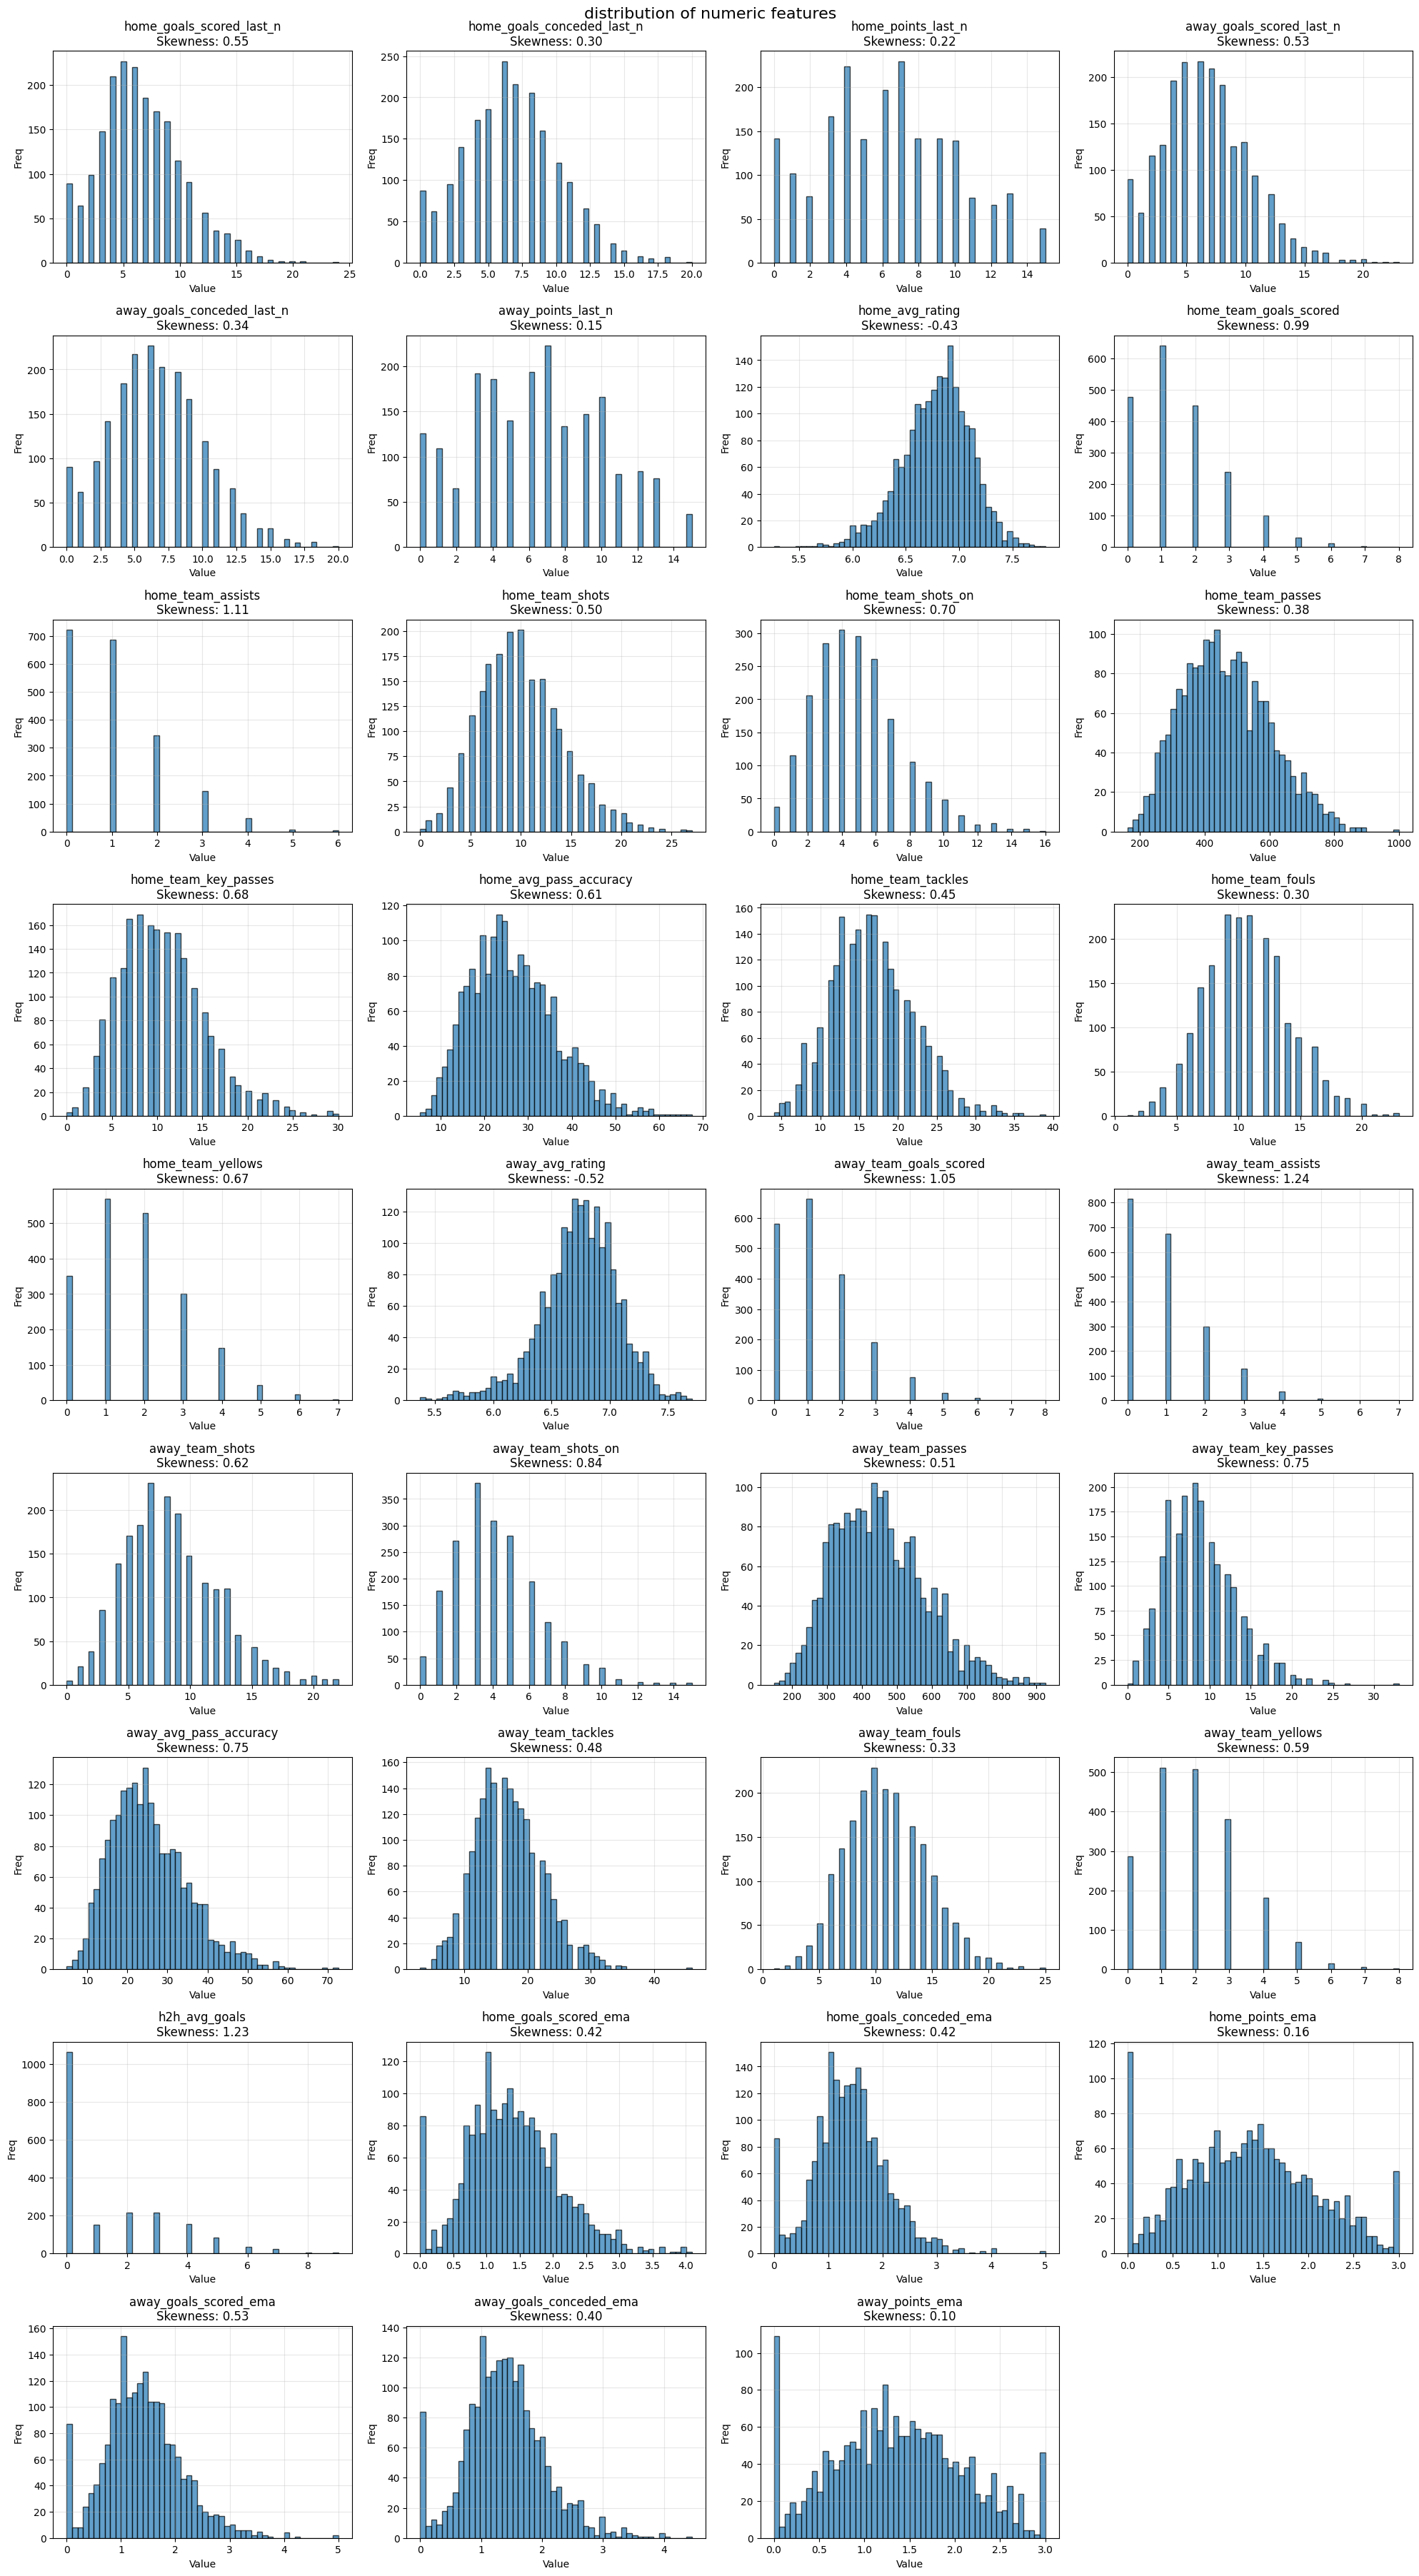

In [7]:
def univariate_numeric_analysis(df, numeric_features):
    numeric_continuous = [col for col in numeric_features 
                          if df[col].nunique() > 6]
    
    print("\n📊 Descriptive statistics:")
    stats = df[numeric_continuous].describe().round(3)
    stats.to_csv('statistics.csv')
    display(stats)
    
    print("\n📈 Skewness i Kurtosis:")
    skew_kurt = pd.DataFrame({
        'Skewness': df[numeric_continuous].skew(),
        'Kurtosis': df[numeric_continuous].kurt()
    })
    print(skew_kurt.sort_values('Skewness', ascending=False))
    
    n_cols = 4
    n_rows = (len(numeric_continuous) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for idx, col in enumerate(numeric_continuous):
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}\nSkewness: {df[col].skew():.2f}')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Freq')
        axes[idx].grid(True, alpha=0.3)
    
    for idx in range(len(numeric_continuous), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.suptitle('distribution of numeric features', y=1.001, fontsize=16)
    plt.show()
    
    return skew_kurt

numeric_stats = univariate_numeric_analysis(df, feature_types['numeric'])



📊 outliers summary:
                  variable  no outliers percent lower bound upper bound
  home_goals_scored_last_n           17   0.87%       -3.50       16.50
home_goals_conceded_last_n           13   0.66%       -3.50       16.50
  away_goals_scored_last_n           24   1.22%       -3.50       16.50
away_goals_conceded_last_n           12   0.61%       -3.50       16.50
           home_avg_rating           26   1.33%        5.96        7.64
    home_team_goals_scored          150   7.65%       -0.50        3.50
         home_team_assists            5   0.26%       -3.00        5.00
           home_team_shots           10   0.51%       -2.00       22.00
        home_team_shots_on           57   2.91%       -1.50       10.50
          home_team_passes            7   0.36%       75.12      848.12
      home_team_key_passes           36   1.84%       -2.00       22.00
    home_avg_pass_accuracy           23   1.17%       -0.64       52.97
         home_team_tackles           23   1

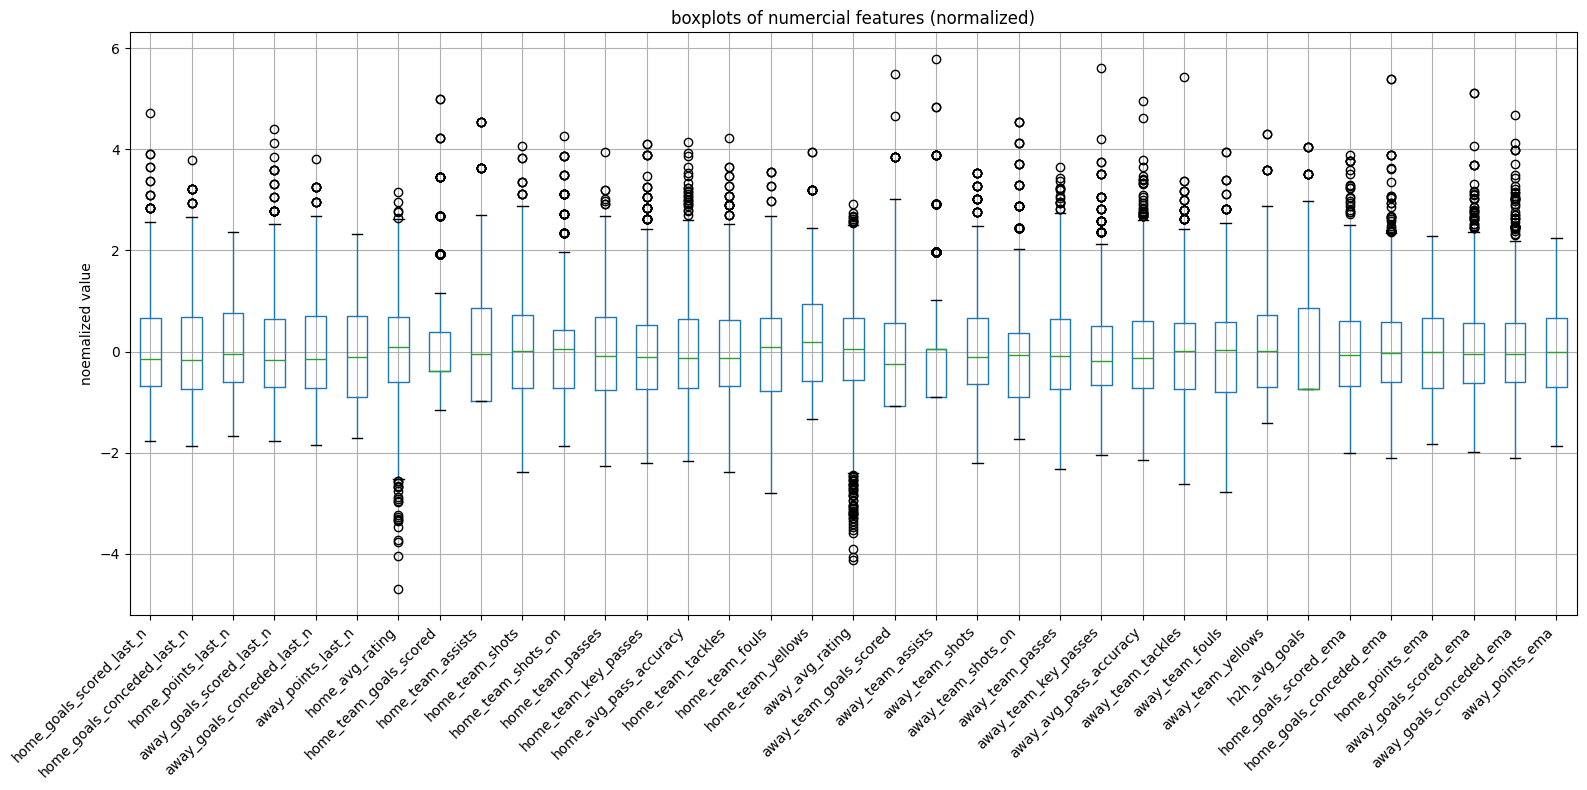

In [8]:
def detect_outliers(df, numeric_features):
    numeric_continuous = [col for col in numeric_features 
                          if df[col].nunique() > 6]
    
    outlier_summary = []
    
    for col in numeric_continuous:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'variable': col,
            'no outliers': outlier_count,
            'percent': f'{outlier_pct:.2f}%',
            'lower bound': f'{lower_bound:.2f}',
            'upper bound': f'{upper_bound:.2f}'
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    outlier_df = outlier_df[outlier_df['no outliers'] > 0]
    
    print("\n📊 outliers summary:")
    print(outlier_df.to_string(index=False))
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df[numeric_continuous]),
        columns=numeric_continuous
    )
    
    plt.figure(figsize=(16, 8))
    df_scaled.boxplot(rot=90, figsize=(16, 8))
    plt.title('boxplots of numercial features (normalized)')
    plt.ylabel('noemalized value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return outlier_df

outliers = detect_outliers(df, feature_types['numeric'])


In [9]:
# def univariate_categorical_analysis(df, categorical_features):
#     for col in categorical_features:
#         print(f"\n📊 variable: {col}")
#         print(f"   unique values: {df[col].nunique()}")
        
#         value_counts = df[col].value_counts()
#         print(f"\n   top 10 most occur values:")
#         print(value_counts.head(10))
        
#         plt.figure(figsize=(12, 5))
        
#         # Bar plot dla top 15
#         top_15 = value_counts.head(15)
#         plt.subplot(1, 2, 1)
#         top_15.plot(kind='barh')
#         plt.title(f'{col} - top 15 values')
#         plt.xlabel('number of occurance')
        
#         # Pie chart dla top 10
#         plt.subplot(1, 2, 2)
#         top_10 = value_counts.head(10)
#         plt.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%')
#         plt.title(f'{col} - distribution Top 10')
        
#         plt.tight_layout()
#         plt.show()

# univariate_categorical_analysis(df, feature_types['categorical'])



📊 correlation with target (match_result):
match_result                  1.000000
home_team_shots_on            0.435647
home_avg_rating               0.350272
home_team_shots               0.311870
home_team_key_passes          0.276945
home_points_ema               0.218187
home_goals_scored_ema         0.203274
home_points_last_n            0.192283
away_goals_conceded_ema       0.182811
home_goals_scored_last_n      0.162450
away_goals_conceded_last_n    0.135578
home_team_passes              0.127203
home_avg_pass_accuracy        0.121418
away_team_fouls               0.071080
away_team_tackles             0.012167
home_team_tackles            -0.017813
home_team_fouls              -0.033709
away_goals_scored_last_n     -0.115312
home_goals_conceded_last_n   -0.131140
away_points_last_n           -0.134513
away_team_passes             -0.138293
away_avg_pass_accuracy       -0.142797
home_goals_conceded_ema      -0.152554
away_goals_scored_ema        -0.162675
away_points_ema      

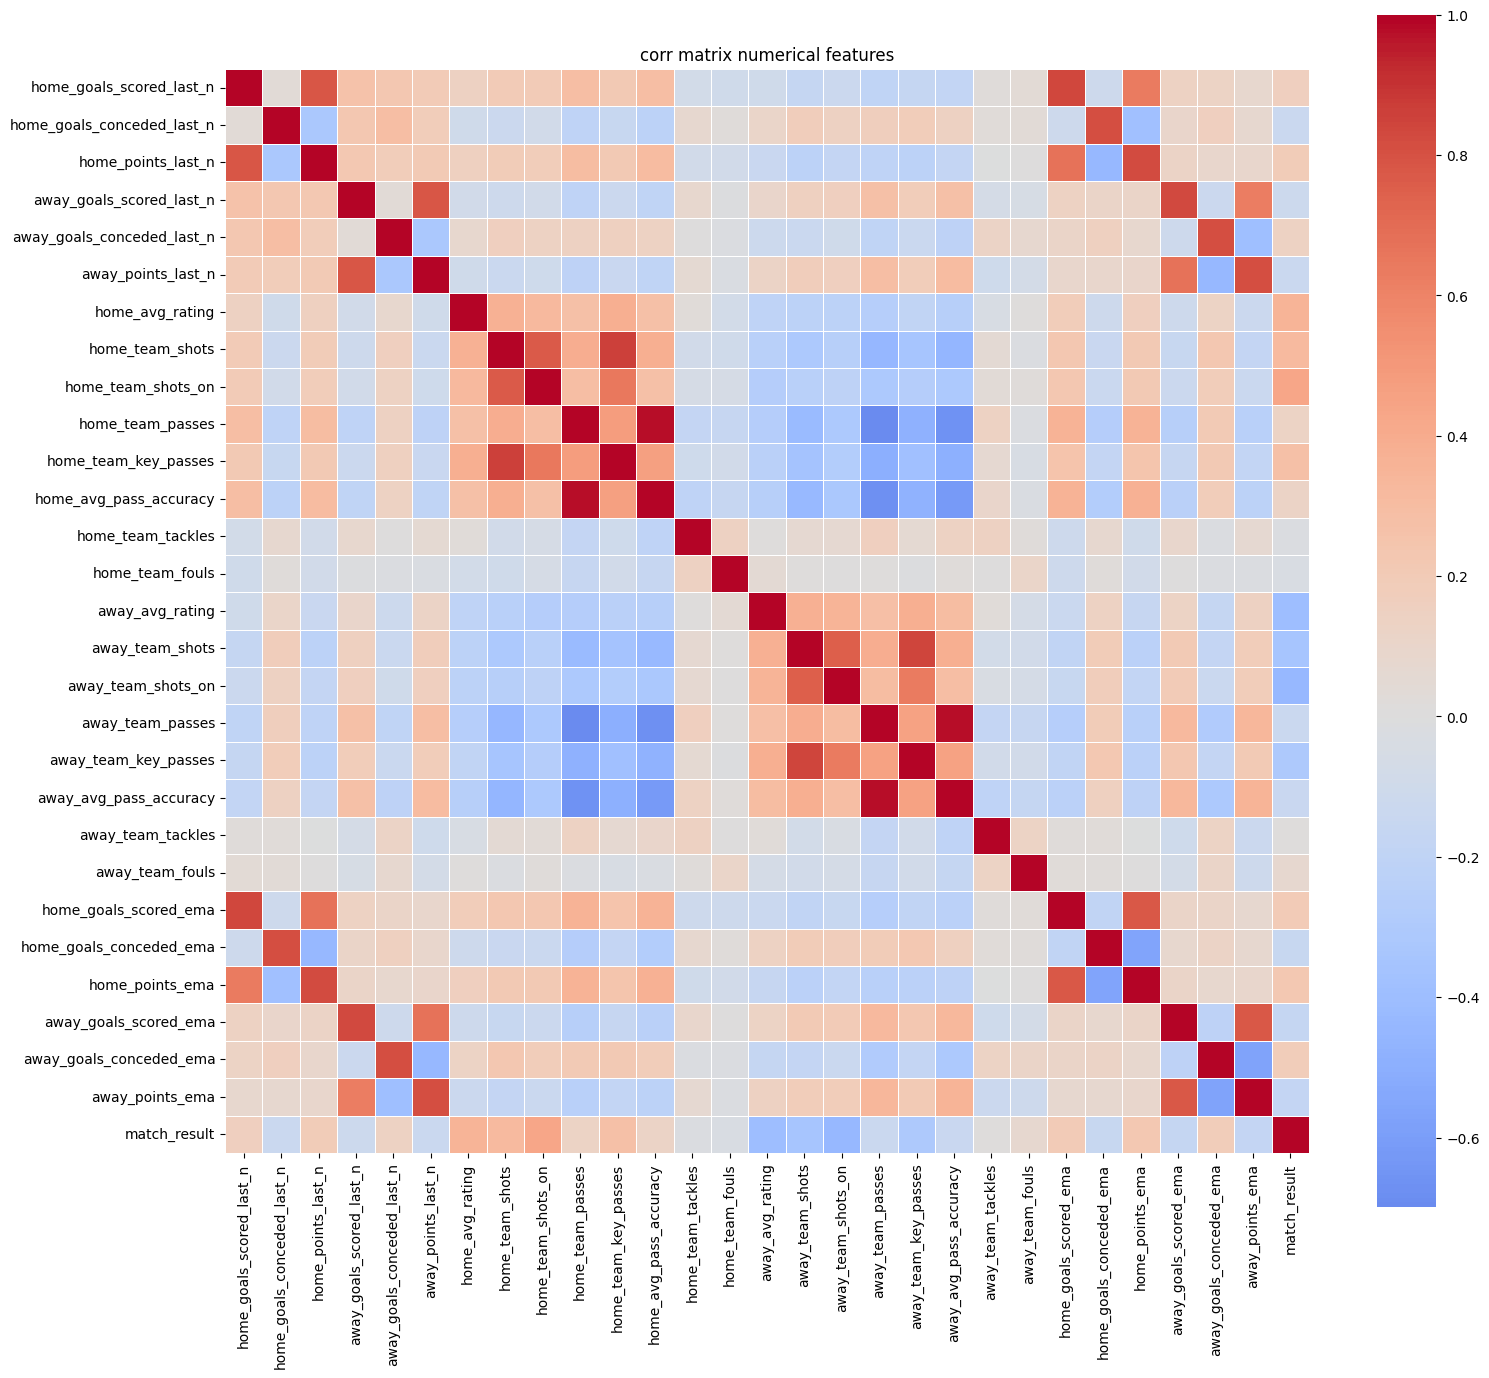


⚠️  strong correlation (|r| > 0.8):
                variable 1              variable 2  corr
  home_goals_scored_last_n   home_goals_scored_ema 0.838
home_goals_conceded_last_n home_goals_conceded_ema 0.817
        home_points_last_n         home_points_ema 0.823
  away_goals_scored_last_n   away_goals_scored_ema 0.829
away_goals_conceded_last_n away_goals_conceded_ema 0.812
        away_points_last_n         away_points_ema 0.810
           home_team_shots    home_team_key_passes 0.856
          home_team_passes  home_avg_pass_accuracy 0.977
           away_team_shots    away_team_key_passes 0.843
          away_team_passes  away_avg_pass_accuracy 0.977


In [10]:
def bivariate_correlation_analysis(df, numeric_features, target='match_result'):
    numeric_continuous = [col for col in numeric_features 
                          if df[col].nunique() > 10 and col != target]
    
    corr_matrix = df[numeric_continuous + [target]].corr(method='spearman')
    
    target_corr = corr_matrix[target].sort_values(ascending=False)
    print(f"\n📊 correlation with target ({target}):")
    print(target_corr)
    
    plt.figure(figsize=(16, 14))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('corr matrix numerical features')
    plt.tight_layout()
    plt.show()
    
    print("\n⚠️  strong correlation (|r| > 0.8):")
    
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr.append({
                    'variable 1': corr_matrix.columns[i],
                    'variable 2': corr_matrix.columns[j],
                    'corr': f'{corr_matrix.iloc[i, j]:.3f}'
                })
    
    if high_corr:
        high_corr_df = pd.DataFrame(high_corr)
        print(high_corr_df.to_string(index=False))
    else:
        print("lack of strong corr (|r| > 0.8)")
    
    return corr_matrix, target_corr

corr_matrix, target_corr = bivariate_correlation_analysis(df, feature_types['numeric'])



📊 target dist (match_result):
match_result
 1    848
-1    662
 0    450
Name: count, dtype: int64

percent:
match_result
 1    43.27
-1    33.78
 0    22.96
Name: count, dtype: float64


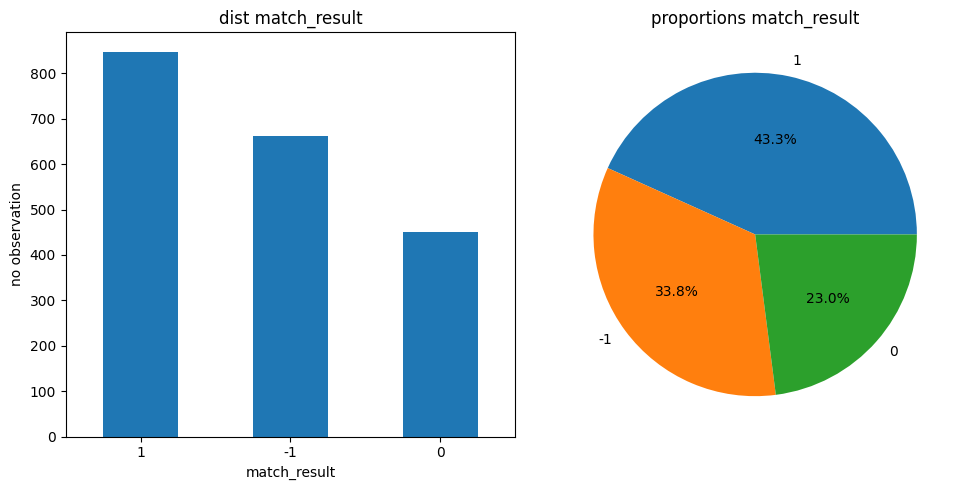

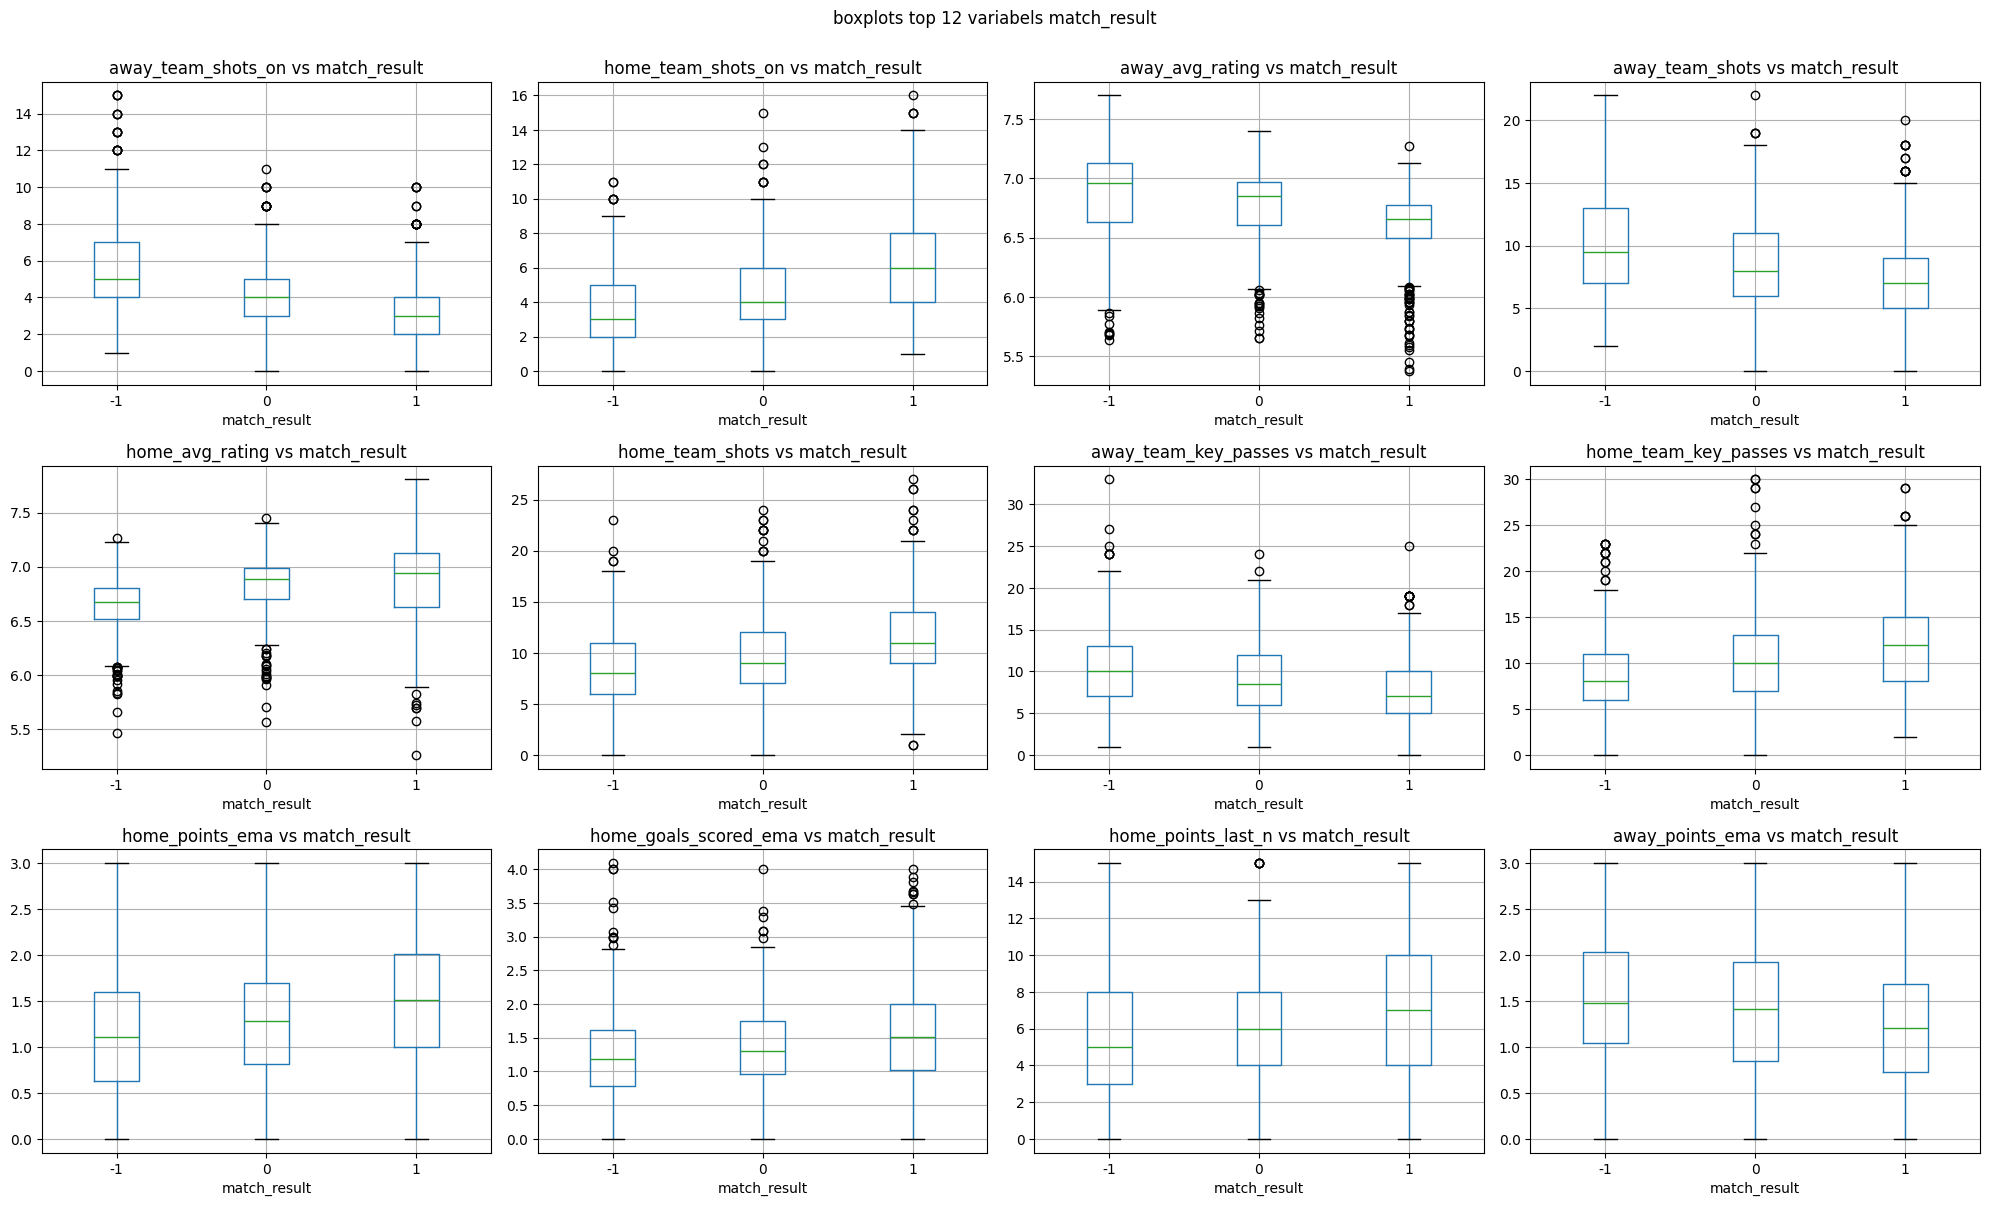

In [11]:
def target_relationship_analysis(df, feature_types, target='match_result'):
    print(f"\n📊 target dist ({target}):")
    target_dist = df[target].value_counts()
    print(target_dist)
    print(f"\npercent:")
    print((target_dist / len(df) * 100).round(2))
    
    # Wizualizacja targetu
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    target_dist.plot(kind='bar')
    plt.title(f'dist {target}')
    plt.ylabel('no observation')
    plt.xticks(rotation=0)
    
    plt.subplot(1, 2, 2)
    plt.pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%')
    plt.title(f'proportions {target}')
    
    plt.tight_layout()
    plt.show()
    
    numeric_continuous = [col for col in feature_types['numeric'] 
                          if df[col].nunique() > 10 and col != target]
    
    corr_with_target = df[numeric_continuous].corrwith(df[target]).abs().sort_values(ascending=False)
    top_features = corr_with_target.head(12).index.tolist()
    
    fig, axes = plt.subplots(3, 4, figsize=(20, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(top_features):
        df.boxplot(column=col, by=target, ax=axes[idx])
        axes[idx].set_title(f'{col} vs {target}')
        axes[idx].set_xlabel(target)
        plt.sca(axes[idx])
        plt.xticks(rotation=0)
    
    plt.suptitle(f'boxplots top 12 variabels {target}', y=1.001)
    plt.tight_layout()
    plt.show()

target_relationship_analysis(df, feature_types)



🔍 Principal Component Analysis (PCA):
explained variance PC1: 25.59%
explained variance PC2: 14.11%
total explained variance: 39.70%

🔍 t-SNE Analysis:


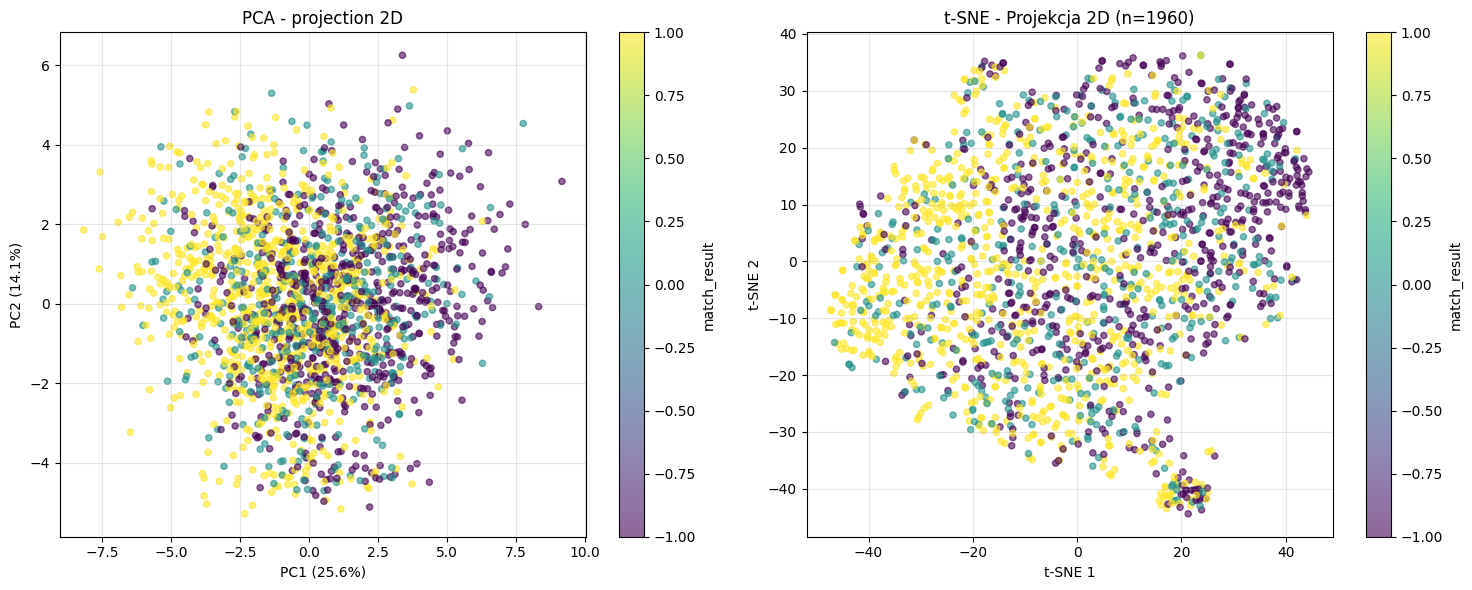


📊 Top 10 most importatnt features according PC1:
               Feature  PC1_Loading
      away_team_passes     0.294468
      home_team_passes     0.293208
home_avg_pass_accuracy     0.287093
away_avg_pass_accuracy     0.286964
  home_team_key_passes     0.257954
  away_team_key_passes     0.254701
       home_team_shots     0.245779
       away_team_shots     0.244259
    away_team_shots_on     0.208518
    home_team_shots_on     0.205879


In [12]:
def multivariate_analysis(df, numeric_features, target='match_result'):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    from sklearn.preprocessing import StandardScaler
    
    numeric_continuous = [col for col in numeric_features 
                          if df[col].nunique() > 10 and col != target]
    
    X = df[numeric_continuous].fillna(df[numeric_continuous].mean())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA
    print("\n🔍 Principal Component Analysis (PCA):")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    print(f"explained variance PC1: {pca.explained_variance_ratio_[0]:.2%}")
    print(f"explained variance PC2: {pca.explained_variance_ratio_[1]:.2%}")
    print(f"total explained variance: {pca.explained_variance_ratio_.sum():.2%}")
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                         c=df[target], cmap='viridis', alpha=0.6, s=20)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('PCA - projection 2D')
    plt.colorbar(scatter, label=target)
    plt.grid(True, alpha=0.3)
    
    print("\n🔍 t-SNE Analysis:")
    sample_size = min(5000, len(df))
    sample_idx = np.random.choice(len(df), sample_size, replace=False)
    
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(X_scaled[sample_idx])
    
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                         c=df[target].iloc[sample_idx], 
                         cmap='viridis', alpha=0.6, s=20)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title(f't-SNE - Projekcja 2D (n={sample_size})')
    plt.colorbar(scatter, label=target)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Top 10 most importatnt features according PC1:")
    feature_importance = pd.DataFrame({
        'Feature': numeric_continuous,
        'PC1_Loading': np.abs(pca.components_[0])
    }).sort_values('PC1_Loading', ascending=False)
    
    print(feature_importance.head(10).to_string(index=False))
    
    return X_pca, X_tsne

pca_result, tsne_result = multivariate_analysis(df, feature_types['numeric'])
